greatlearning-brand.svg

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## <font color = "blue">Table of Contents</font>
  ### <font color = "blue">Simple Storage Contract</font>
  ### <font color = "blue">Simple Storage Payable Contract</font>
  ### <font color = "blue">Voting Contract</font>

### <font color = "blue">Simple Storage Contract</font>

We will write a very simple contract with one private string type variable.  
This contract will provide a functionality of setting and getting a value to this variable.  
This contract also implements a constructor that initializes this variable at the time of contract deployment.  

In [ ]:
// SPDX-License-Identifier: MIT

pragma solidity 0.8.16;

contract SimpleStorage{

    //This will not be be accessible outside the contract and will not be available externally
    string private _dataStorage;
    
    //This constructor is defined to store the data into dataStorage variable
    constructor(string memory _data){
        _dataStorage = _data;
    }

    //This function will set the data to the dataStorage variable
    function setData(string memory _data) public{
        _dataStorage = _data;
    }

    
    //This function will fetch the value of the dataStorage variable and return same to the client
    function getData() public view returns(string memory){
        return _dataStorage;
    }
}

Now to run this code, we will use remix ide which is specially design to compile and deploy the solidity contracts.  
Please use the following link to navigate to the remix ide page : https://remix.ethereum.org/

First step, compile the contract. Refer to the snapshot below.

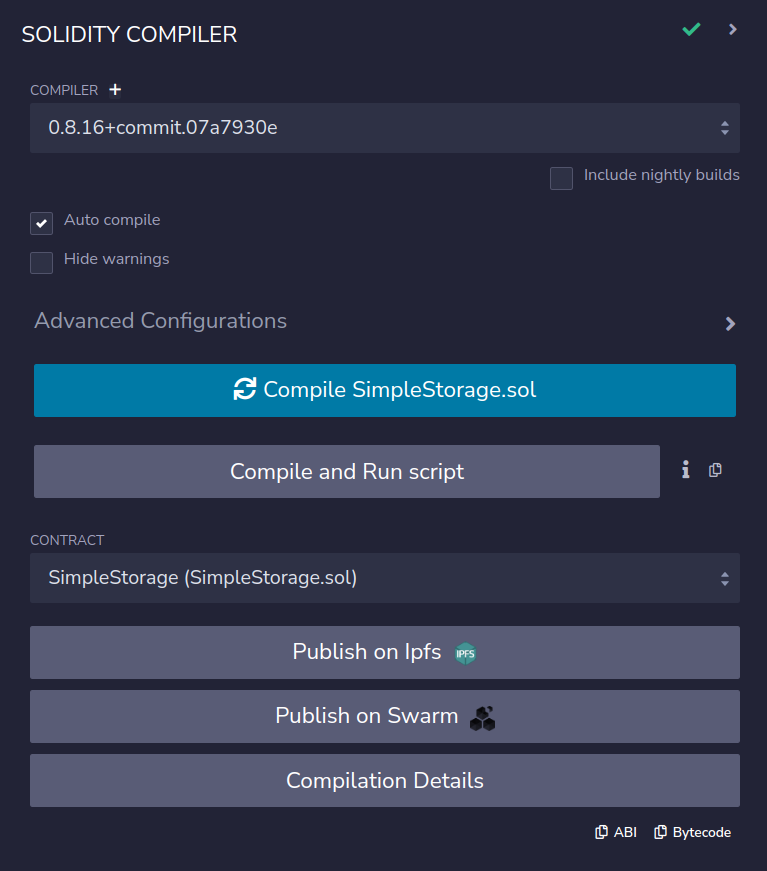

Then, we deploy the contract. Select on the of option from the **ENVIRONMENT**  
You can also set the **gas** limit and the value as well for performing a transaction.  

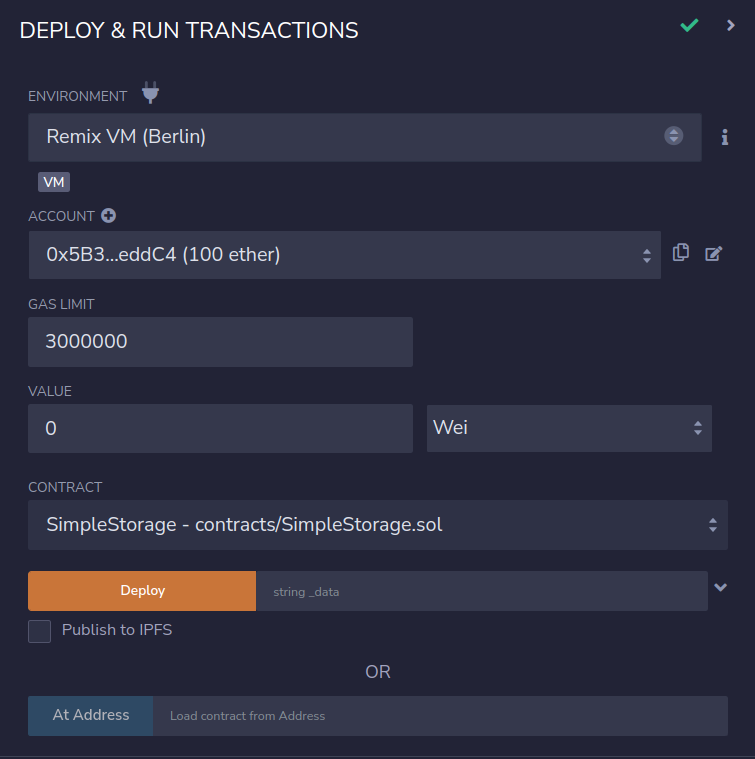

Post deployment, a user can interact with the contract and perform various operations using developed functinalities.  

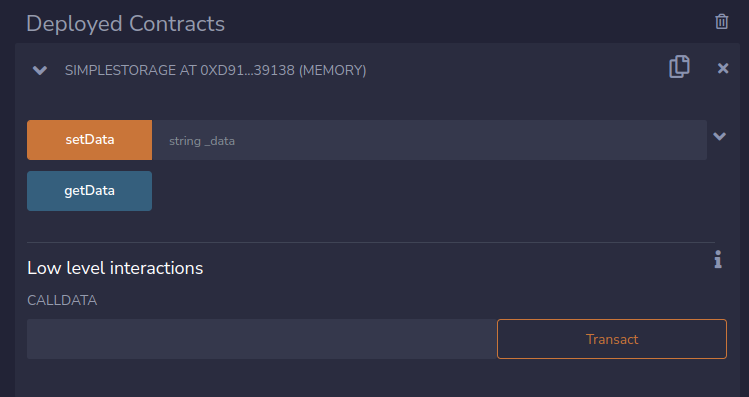

Now we will design a more complex contract.

### <font color = "blue">Simple Storage Payable Contract</font>

In this contract we not only will set and get the value of strorage data but also add a feature of accepting and transferring ethers to other users (addresses).   

In [ ]:
// SPDX-License-Identifier: MIT

pragma solidity 0.8.16;

contract SimpleStoragePayable{

    //Defined a private data store having data type as uint256
    uint256 private dataStored = 0;

    //Defined a private variable having data type as uint256 which can store the ethers
    uint256 private ethersStored = 0;

    //Function which will set data to the data store variable
    function setdata(uint256 data) public{
        dataStored = data;
    }

    //Function which will fetch the value of the data store variable and will return the same
    function getStoredDataValue() public view returns(uint256){
        return dataStored;
    }

    //Function which will fetch the value of ethersStored variable and will return the same
    function getStoredEthersValue() public view returns(uint256){
        return ethersStored;
    }

    //Function will provide the feature to accept ethers and the same will be stored in the data store variable
    //As this is accepting ethers, we need need to make this method payable
    function acceptEthers() public payable{
        ethersStored = ethersStored + msg.value;
    }

    //Function responsible for transferring some ethers to the given address and hence its payable by functionality
    function transferEthers(address payable _toAddress, uint256 ethersValue)public payable {
        require((ethersStored-ethersValue) >= 0, "You don't have sufficient ethers to transfer.");
        ethersStored = ethersStored - ethersValue;
        _toAddress.transfer(ethersValue);
    }

}

Now to run this code, we will use remix ide which is specially design to compile and deploy the solidity contracts.  
Please use the following link to navigate to the remix ide page : https://remix.ethereum.org/  

Once the cotract is deployed, we interact with the contract and perform various transactions using the developed functionalities.   

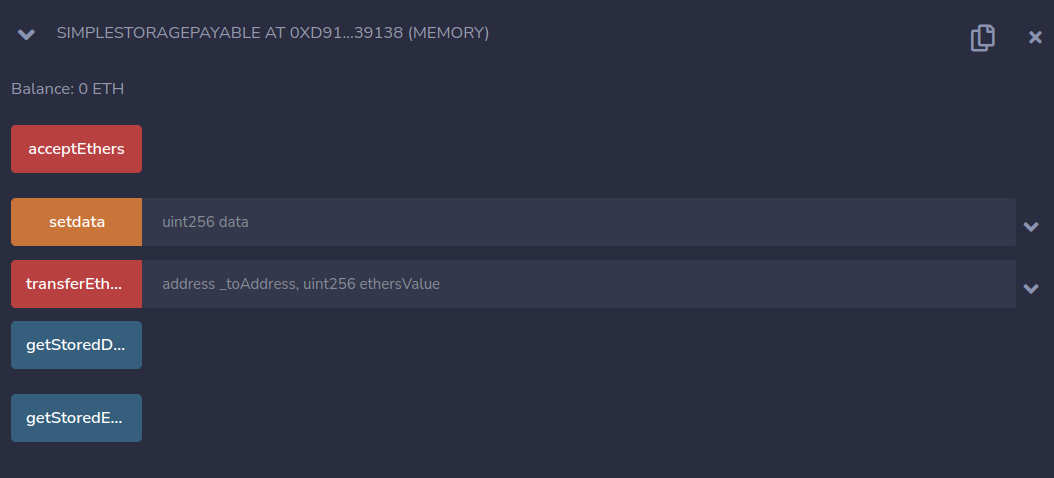

Initially the values of the variables is set to 0.

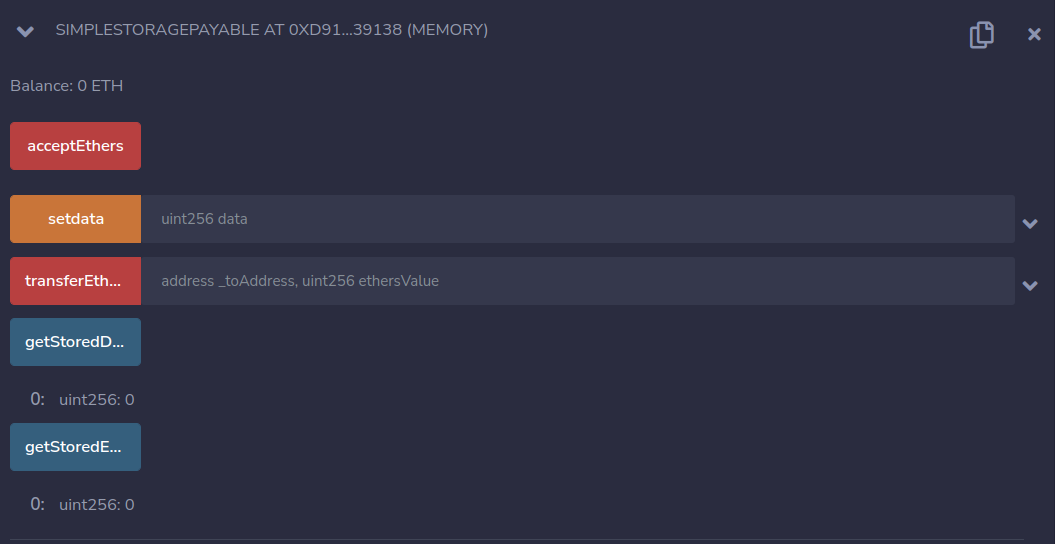

Now let's set the value of the ***dataStored*** variable to 2000. We will perform this operation using the below show functionality and we will click on transact to set the value to 2000 to ***dataStored*** variable

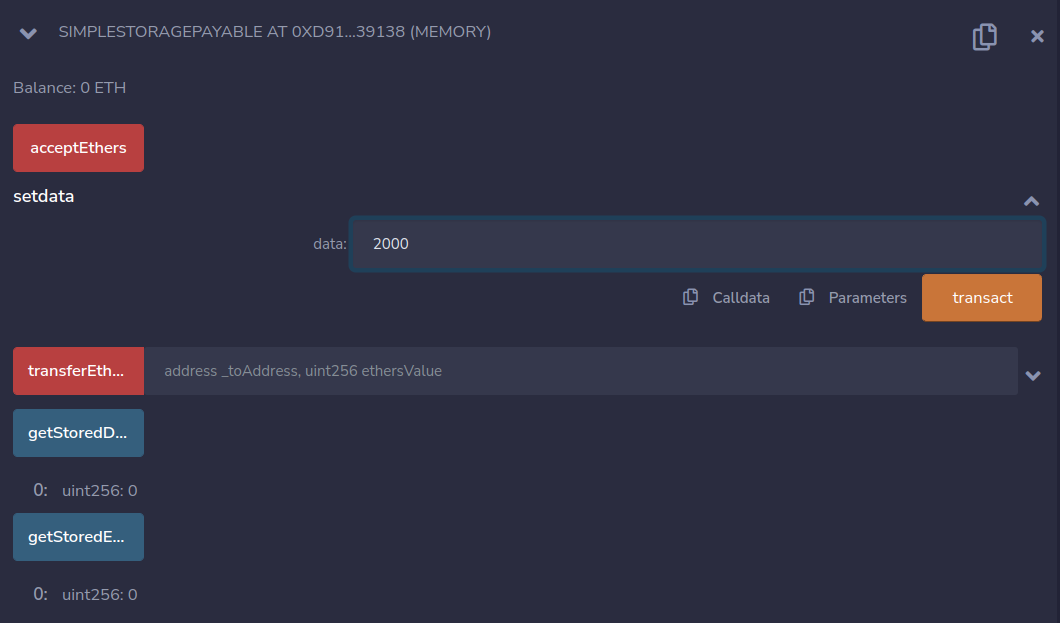

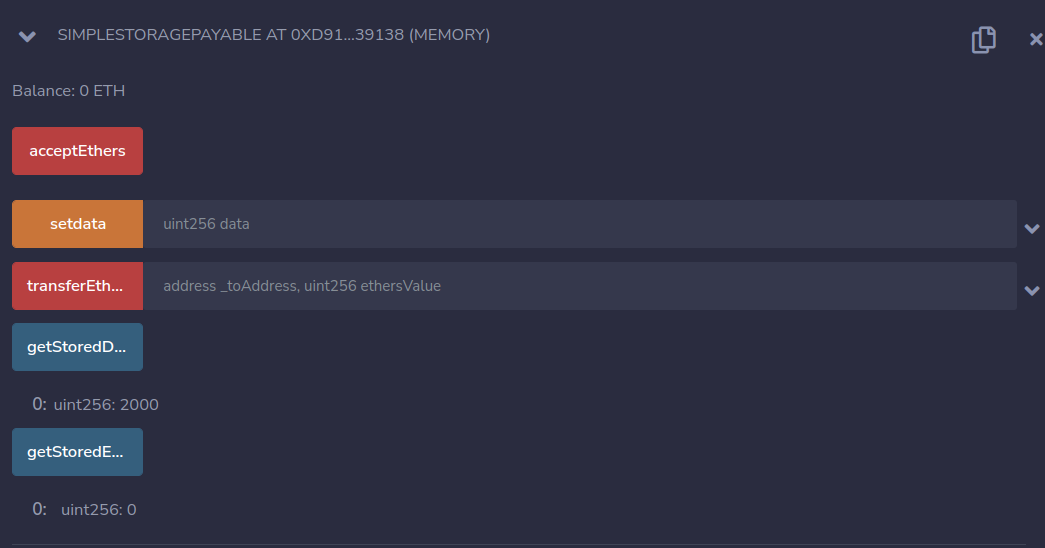

Now, we will try to add some ethers as the value in the ***ethersStored*** variable.

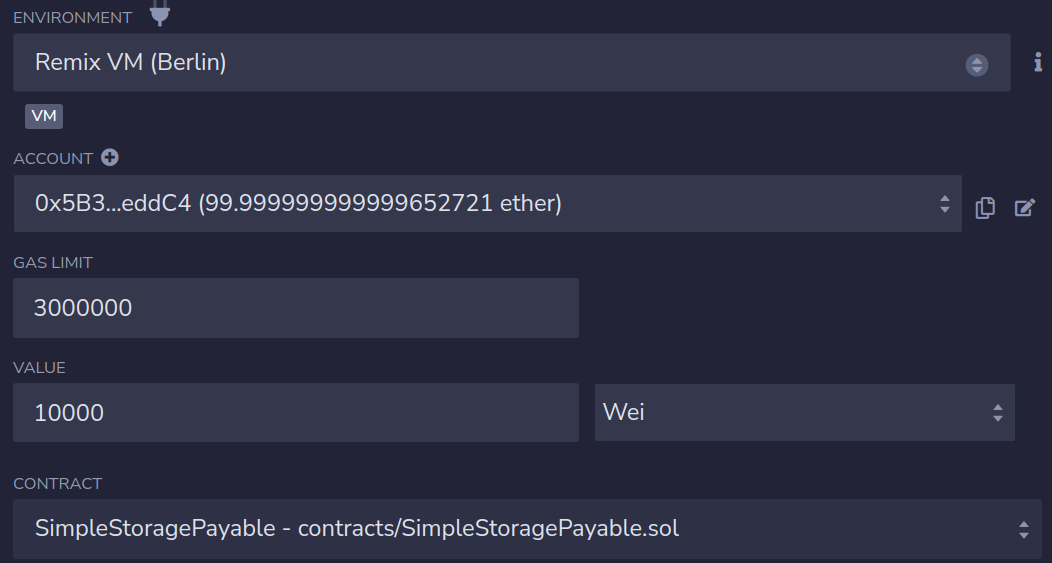

As shown above, we have menitioned the value of the ethers to be stored in the variable ***ethersStored*** using the ***value*** option. Click on *accetEthers* fucntiona button for storing the value as mentioned.

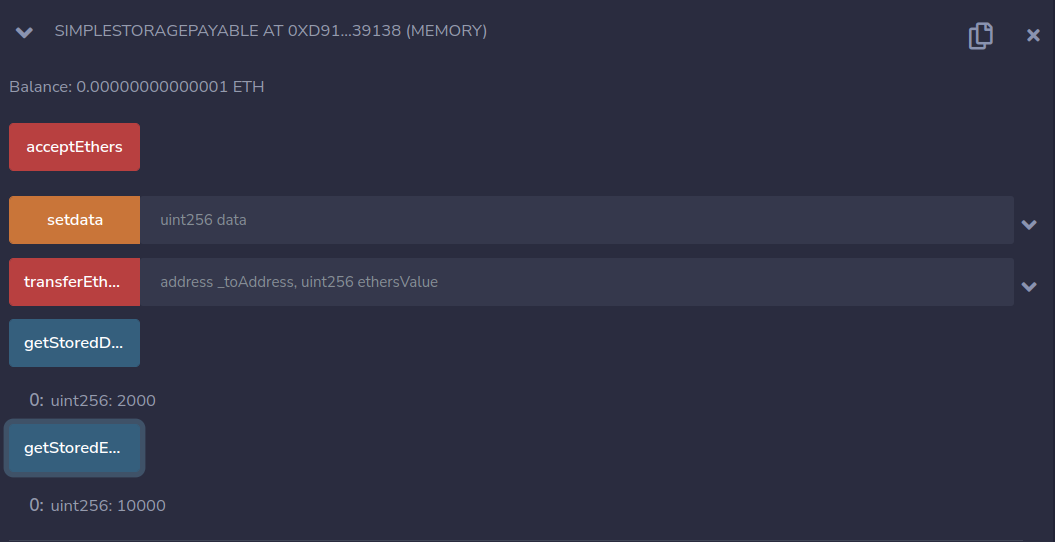

Now both the ***dataStored*** and ***etherStored*** variables have been updated.  
We can send these *ethers* to the other users (addresses) using the function ***transferEthers***. This function requires etheers and the destination address.  
We select the other address(for transferring the ethers other tahn the current address using the account dropdown). Example, we have used the address as ***0xAb8483F64d9C6d1EcF9b849Ae677dD3315835cb2***  

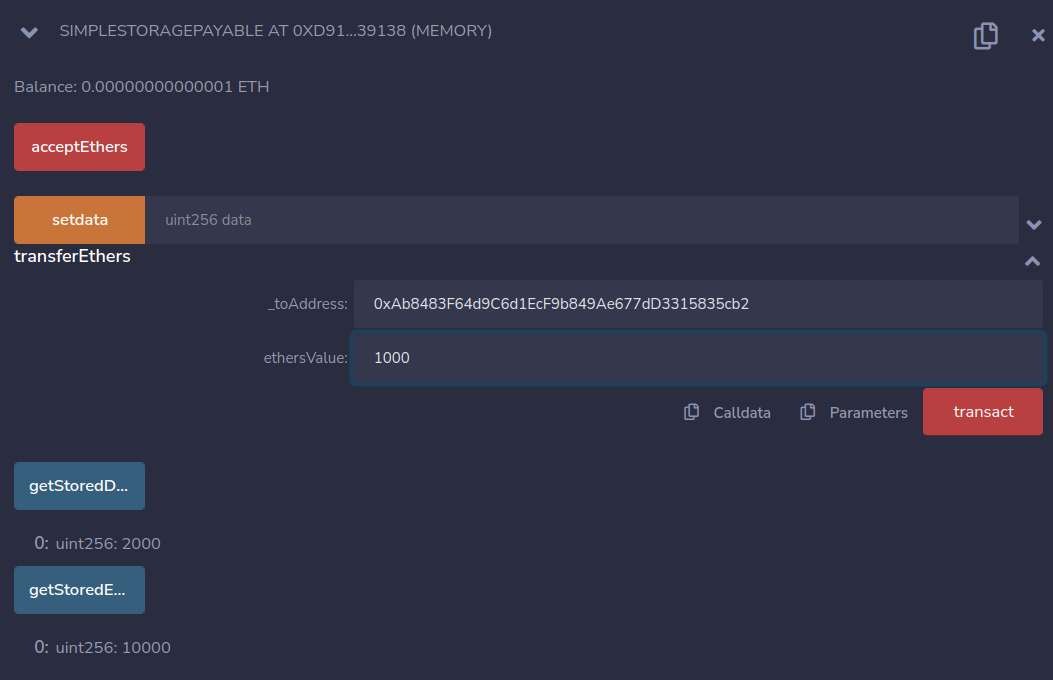

In ***transferEthers*** function, we have mentioned the address along with the ethers value to be transfered. We also have implemented a check to ensure that we have sufficient amount of ethers for the successfull transfer.

Once we click on transact, it will deduct 1000 from the ethersStored variable and credit those to the mentioned address.

### <font color = "blue">Voting Contract</font>

In this example, we will showcase various features of a voting system.  
We have declared the **voting duration** during which a voter can cast a vote to any of the canditate.  
As a part of a constructor, when a contract deploys, at this time, voting start time is initialized with a timestamp that indicates the start time of voting activity.  
It also provides a feature of adding a new candidate. The details of candidates is stored in a **mapping** where the **key** will be the candidate ID. And the **value** is the candidate name.   
This ID will be used for casting and counting the votes.  

We have certain events using which we can post the signals/events regarding:
* When a candidate is added.  
* Who casted a vote and to whom has it been casted.  
* When the voting is still in active state
* When the voting is comcomplete, its the time to declare a winner.  

The logic is written in such a way that we only have one winner.  

In [ ]:
// SPDX-License-Identifier: MIT

pragma solidity 0.8.16;

contract Voting{
    
    //It will store the voting duration in which the voting can be exercised.
    uint256 private VOTING_DURATION = 2 minutes;

    //It will store the voting start timestamp.
    uint256 private _voteStartTime;

    //It will store the winner once voting is completed.
    string public _winner;

    //This will store the number of votes given to the respective candidates
    mapping(uint8 => uint256) private _candidateVotingTotals;

    //This will store the candidates with there respective candidate ids
    mapping(uint8 => string) private _candidates;

    //This is a counter variable which will store the number of candidates added to the list
    uint8 private _numberOfCandidatesPresent = 0;

    //These are all the events that we will be using in order to send the signals once specific onces are trigerred
    event VoteCasted(address voterAddress, string VotedForCandidateName);
    event VotingStillActive(uint256 timeRemainingForVote);
    event VotingCompleted(string winner);
    event CandidateAdded(string _candidateName);

    //As a part of constructor, we will be setting block timestamp as the voting start time
    constructor() {
        _voteStartTime = block.timestamp;

    }

    //This function is responsble for adding new candidate in the candiate pool in _candidates mapping
    //Here we first check if the candidate name entered is not null or is not empty
    //Once candidate is added in the candidates mapping, we will publish an event named as CandidateAdded along with candidate name
    
    function addCandidate(string memory _candidateName) public returns(uint8){
        require(bytes(_candidateName).length != 0, "Please enter the name of the candidate to be added to the list.");
        _candidates[_numberOfCandidatesPresent] = _candidateName;
        _numberOfCandidatesPresent += 1;
        emit CandidateAdded(_candidateName);
        return _numberOfCandidatesPresent - 1;
    }

    //This function is responsible for casting vote to the given candidate from the candidate pool. 
    //We will take candidate id as the input and will increment the vote count against the 
    //candidate id in the _candidateVotingTotals mapping.
    //Also before casting vote the contract will check if the voting time is over or not.
    //If its over, then it will emit the signal as voting completed along with the declared winner 
    //else it will emit the signal as vote casted along with voter address and the candidate name
    
    function castVoteForCandidate(uint8 _candidateId) external{
        if(block.timestamp <= _voteStartTime + VOTING_DURATION){
            _candidateVotingTotals[_candidateId] += 1;
            emit VoteCasted(msg.sender, _candidates[_candidateId]);
        } else{
            emit VotingCompleted(_winner);
        }
    }

    //This function is responsible for calculating votes and declare the winner, the one having highest votes.
    //We are assuming that there will be only one candidate with the highest votes.
    //For this we will first check if the voting time is completed or not. 
    //If yes then we will compute the winner accordingly and will emit the signal as voting completed along with the winner candidate name.
    //If not, then we will emit the signal as voting is still active along with the time remaining for voting.
    
    function calculateVotes() public{
        if(block.timestamp > _voteStartTime + VOTING_DURATION){
            uint8 _currentWinner = 0;
            for(uint8 i = 0; i<_numberOfCandidatesPresent;i++){
                if(_candidateVotingTotals[i] > _candidateVotingTotals[_currentWinner]){
                    _currentWinner = i;
                }
            }

            _winner = _candidates[_currentWinner];
            emit VotingCompleted(_winner);
        } else{
            emit VotingStillActive((_voteStartTime + VOTING_DURATION) - block.timestamp);
        }
    }

}

Now to run this code, we will use remix ide which is specially design to compile and deploy the solidity contracts. Please follow the link in order to navigate to the remix ide page : https://remix.ethereum.org/

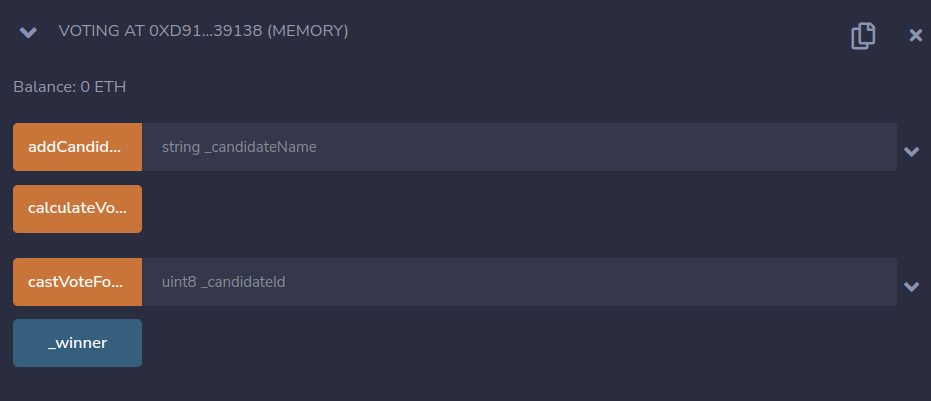

When you deploy the contract, the voting will start and it will set the block timestamp to the ***_voteStartTime*** variable

Using ***addCandidate*** feature, we can add the candidates to the voting system against which the votings will be casted.

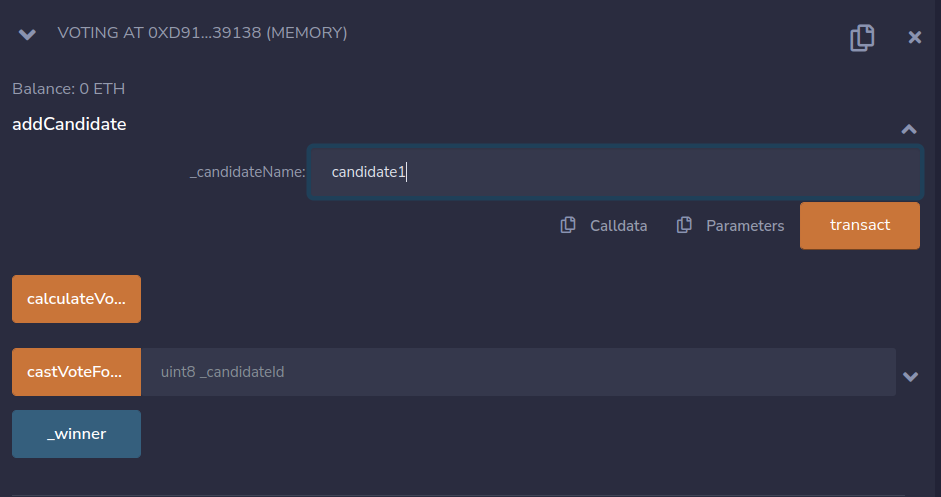

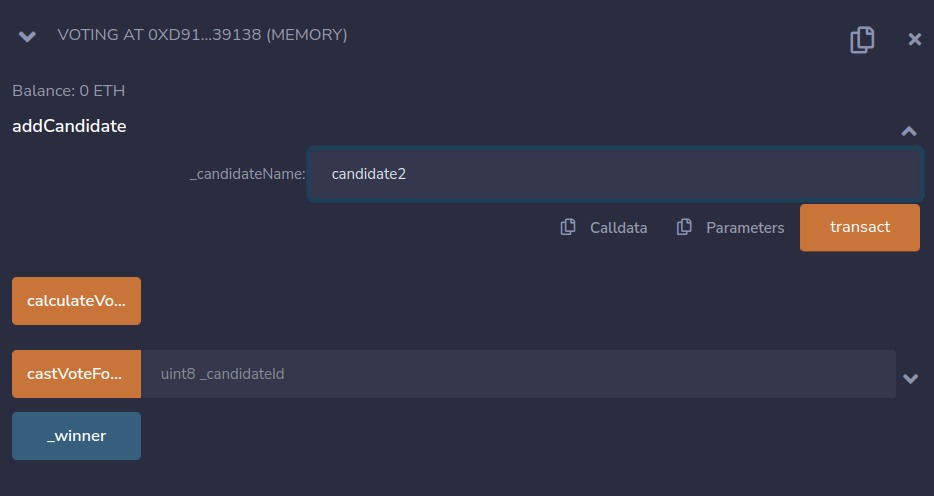

Now, we can start voting th respective candidate by passing the candidateId as the parameter to ***castVoteForCandidate*** function. 

For example, if we need to cast vote to ***candidate1***, then we will pass 0 as the candidateId to this function.

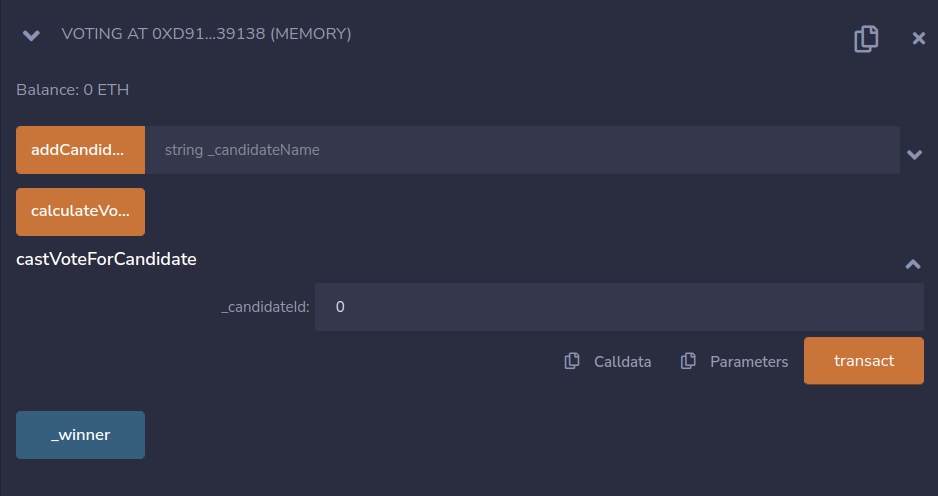

Now once the voting is completed, we can run the ***calculateVotes*** function for calculating the winner. And post this we can fetch the winner for this voting activity. If we are calcutaing the votes before the voting duration end, then it will emit the event as ***VotingStillActive***.

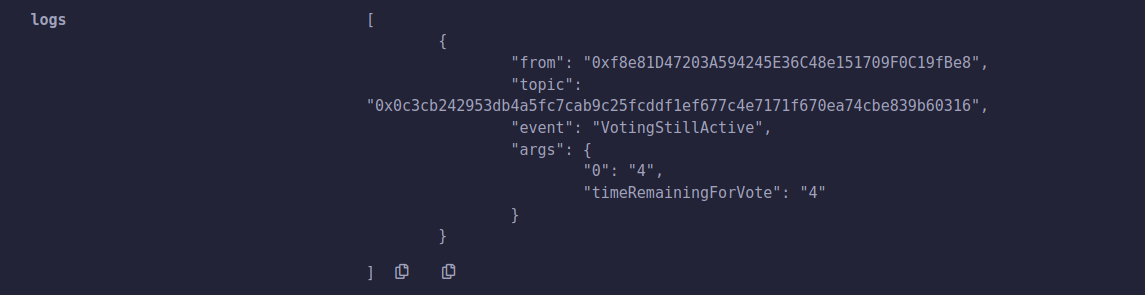

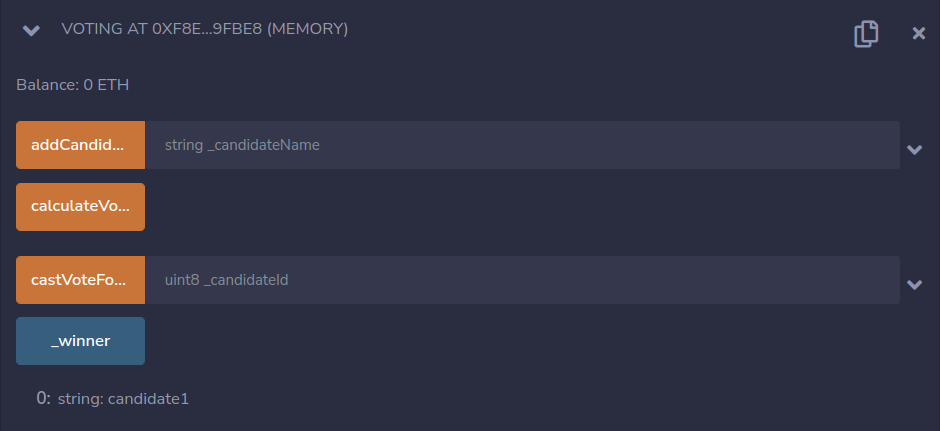